In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import pymc3 as pm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

## Helper Functions

In [8]:
def compute_grid_approximation(prior, success=6, tosses=9):
    """
        This function helps calculate a grid approximation of the posterior distribution.
        
        Parameters:
            prior: np.array
                A distribution representing our state of knowledge before seeing the data.
                Number of items should be the same as number of grid points.
                
            success: integer
                Number of successes.
            
            tosses: integer
                Number of tosses (i.e. successes + failures).
                
        Returns: 
            p_grid: np.array
                Evenly-spaced out grid between 0 and 1.
                
            posterior: np.array
                The posterior distribution.
    """
    # define grid
    p_grid = np.linspace(0, 1, prior.shape[0])

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    
    return p_grid, posterior, success, tosses

In [9]:
def plot_grid_approximation(p_grid, posterior, success, tosses, x_label):
    """
        This function plots a grid approximation of the posterior distribution.
    """
    plt.plot(p_grid, posterior, 'o-', label=f'Success = {success}\nTosses = {tosses}')
    plt.xlabel(x_label)
    plt.ylabel('Posterior Probability')
    plt.legend(loc=0)

## 2M1

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


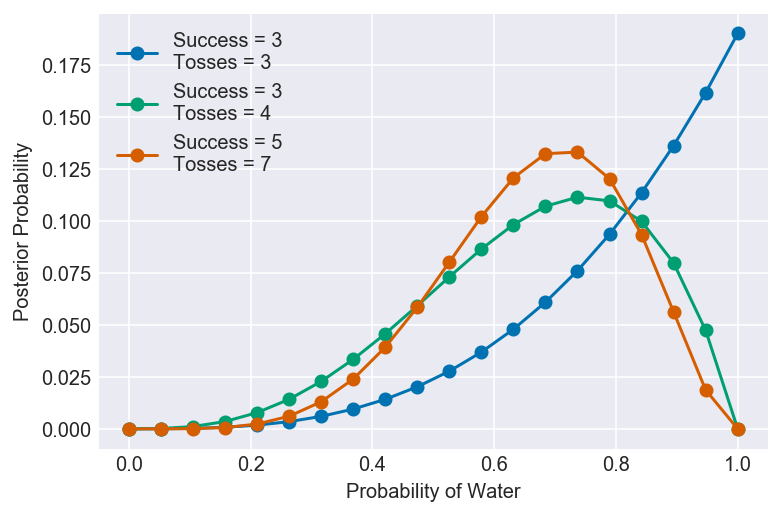

In [13]:
# We'll create distributions with 20 points
prior = np.ones(20)
print(prior)
x_label = 'Probability of Water'
# 1
pg, po, s, t = compute_grid_approximation(prior, success=3, tosses=3)
plot_grid_approximation(pg, po, s, t, x_label)
# 2
pg, po, s, t = compute_grid_approximation(prior, 3, 4)
plot_grid_approximation(pg, po, s, t, x_label)
# 3
pg, po, s, t = compute_grid_approximation(prior, 5, 7)
plot_grid_approximation(pg, po, s, t, x_label)

## 2M2

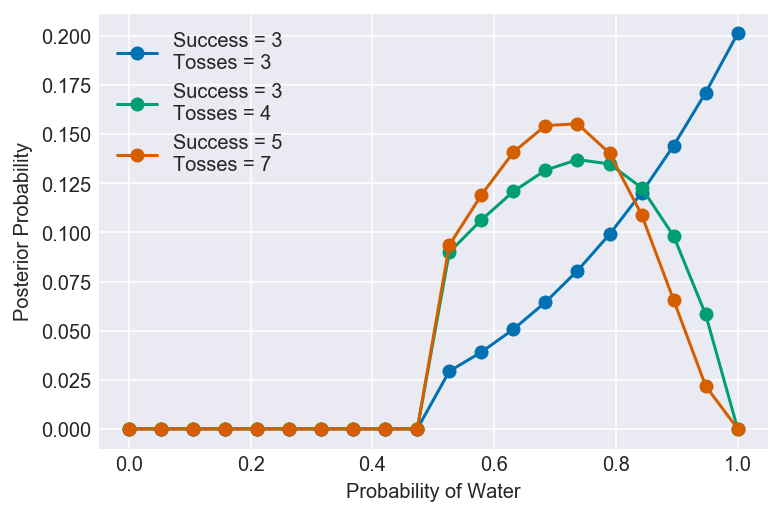

In [15]:
# Create distributions with 20 points
p_grid = np.linspace(start=0, stop=1, num=20)
prior = np.where(p_grid < 0.5, 0, 1)
x_label = 'Probability of Water'
# 1) W, W, W
pg, po, s, t = compute_grid_approximation(prior, success=3, 3)
plot_grid_approximation(pg, po, s, t, x_label)
# 2) W, W, W, L
pg, po, s, t = compute_grid_approximation(prior, 3, 4)
plot_grid_approximation(pg, po, s, t, x_label)
# 3) L, W, W, L, W, W, W
pg, po, s, t = compute_grid_approximation(prior, 5, 7)
plot_grid_approximation(pg, po, s, t, x_label)

## 2M3

$$P(S=a \mid C_1=2) = \frac{P(C_1=2 \mid S=a)P(S=a)}{P(C_1=2)} = \frac{0.05}{0.05+0.1} = \frac{1}{3}$$
$$P(S=b \mid C_1=2) = 1 - P(S=a \mid C_1=2)=\frac{2}{3}$$
$$P(C_2=2 \mid C_1=2) = \sum_S P(C_2=2, S, \mid C_1=2)\\
= P(C_2=2, S=a \mid C_1=2) + P(C_2=2, S=b \mid C_1=2)\\
= P(C_2=2 \mid S=a, C_1=2) \cdot P(S=a \mid C_1=2 \quad+ P(C_2=2 \mid S=b, C_1=2) \cdot P(S=b \mid C_1=2)\\
= P(C_2=2 \mid S=a) \cdot P(S=a \mid C_1=2) \quad+ P(C_2=2 \mid S=b) \cdot P(S=b \mid C_1=2) \text{Conditional independence. See Note below}\\
= \frac{1}{10} \times \frac{1}{3} + \frac{2}{10} \times \frac{2}{3}\\
= \frac{1}{30} + \frac{4}{30}\\
= \frac{1}{6}$$

## 2M4

In [2]:
import scipy.stats as stats

## 2M5

In [3]:
stats.binom.pmf(range(3), n=2, p=0.7)

array([0.09, 0.42, 0.49])

## 2M6

In [10]:
stats.binom.rvs(size=10, n=2, p=0.7)

array([1, 0, 2, 1, 2, 2, 1, 2, 2, 2])

## 2M7

(array([2.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.4500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.1330e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 7.3860e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.6740e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.5095e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.4892e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6306e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0310e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0480e+03]),
 array([0.  , 0.18, 0.36, 0.54, 0.72, 0.9 , 1.08, 1.26, 1.44, 1.62, 1.8 ,
        1.98, 2.16, 2.34, 2.52, 2.7 , 2.88, 3.06, 3.24, 3.42, 3.6 , 3.78,
        3.96, 4.14, 4.32, 4.5 , 4.68, 4.86, 5.04, 5.22, 5.4 , 5.58, 5.76,
        5.94, 6.12, 6.3 , 6.48, 6.66, 6.84, 7.02, 7.2 , 7.38, 7.56, 7.74,
        7.92, 8.1 , 8.

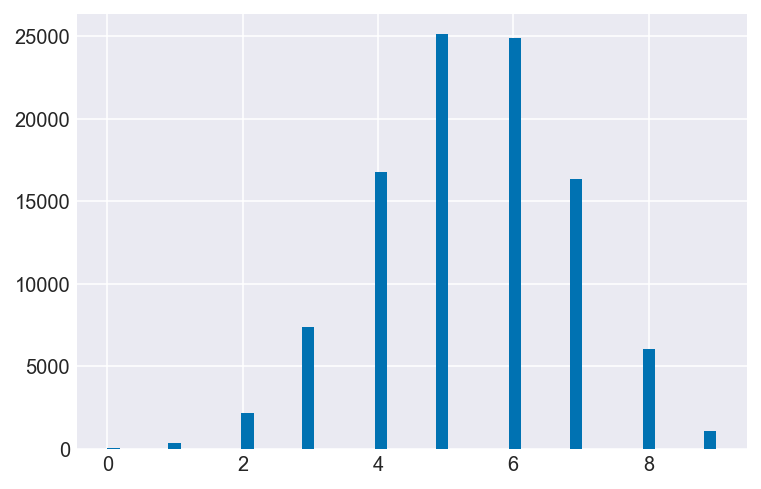

In [32]:
dummy_w = stats.binom.rvs(size=100000, n=9, p=0.6)
# [(dummy_w == i).mean() for i in range(3)]
plt.hist(dummy_w, bins=50)

## 2H1

In [3]:
pg, po, w, n = grid_approximation(np.ones(20), 6, 9)
samples = np.random.choice(pg, p=po, size=10000, replace=True)

## 2H2

(array([  19.,    0.,    0.,    0.,    0.,  124.,    0.,    0.,    0.,
           0.,    0.,  374.,    0.,    0.,    0.,    0.,  733.,    0.,
           0.,    0.,    0.,    0., 1271.,    0.,    0.,    0.,    0.,
        1748.,    0.,    0.,    0.,    0.,    0., 2014.,    0.,    0.,
           0.,    0., 1911.,    0.,    0.,    0.,    0.,    0., 1283.,
           0.,    0.,    0.,    0.,  523.]),
 array([0.  , 0.18, 0.36, 0.54, 0.72, 0.9 , 1.08, 1.26, 1.44, 1.62, 1.8 ,
        1.98, 2.16, 2.34, 2.52, 2.7 , 2.88, 3.06, 3.24, 3.42, 3.6 , 3.78,
        3.96, 4.14, 4.32, 4.5 , 4.68, 4.86, 5.04, 5.22, 5.4 , 5.58, 5.76,
        5.94, 6.12, 6.3 , 6.48, 6.66, 6.84, 7.02, 7.2 , 7.38, 7.56, 7.74,
        7.92, 8.1 , 8.28, 8.46, 8.64, 8.82, 9.  ]),
 <a list of 50 Patch objects>)

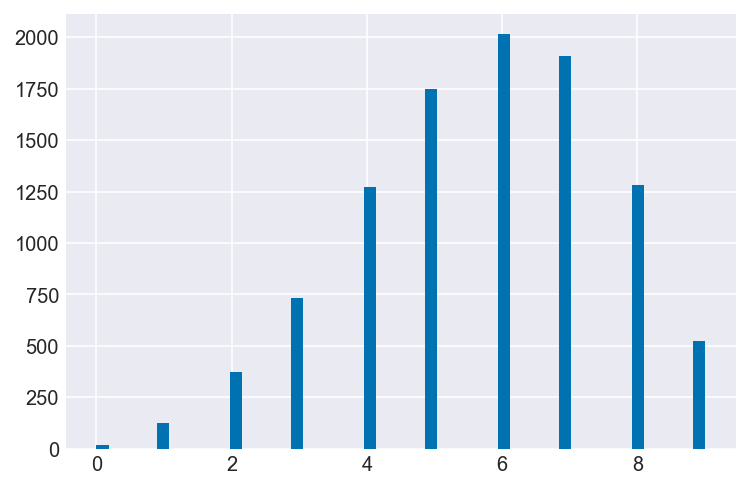

In [37]:
dummy_w = stats.binom.rvs(size=10000, n=n, p=samples)
# [(dummy_w == i).mean() for i in range(3)]
plt.hist(dummy_w, bins=50)

## 2H3

(array([ 1.,  0.,  0.,  2.,  3.,  3.,  5.,  2.,  7.,  6., 10., 14., 14.,
        19., 15., 17., 19., 24., 23., 25., 25., 36., 32., 46., 35., 34.,
        35., 57., 37., 40., 39., 38., 30., 43., 26., 42., 23., 27., 27.,
        26., 36., 16., 13., 10.,  5.,  4.,  1.,  4.,  3.,  1.]),
 array([0.23523524, 0.24990991, 0.26458458, 0.27925926, 0.29393393,
        0.30860861, 0.32328328, 0.33795796, 0.35263263, 0.36730731,
        0.38198198, 0.39665666, 0.41133133, 0.42600601, 0.44068068,
        0.45535536, 0.47003003, 0.4847047 , 0.49937938, 0.51405405,
        0.52872873, 0.5434034 , 0.55807808, 0.57275275, 0.58742743,
        0.6021021 , 0.61677678, 0.63145145, 0.64612613, 0.6608008 ,
        0.67547548, 0.69015015, 0.70482482, 0.7194995 , 0.73417417,
        0.74884885, 0.76352352, 0.7781982 , 0.79287287, 0.80754755,
        0.82222222, 0.8368969 , 0.85157157, 0.86624625, 0.88092092,
        0.8955956 , 0.91027027, 0.92494494, 0.93961962, 0.95429429,
        0.96896897]),
 <a list of 50

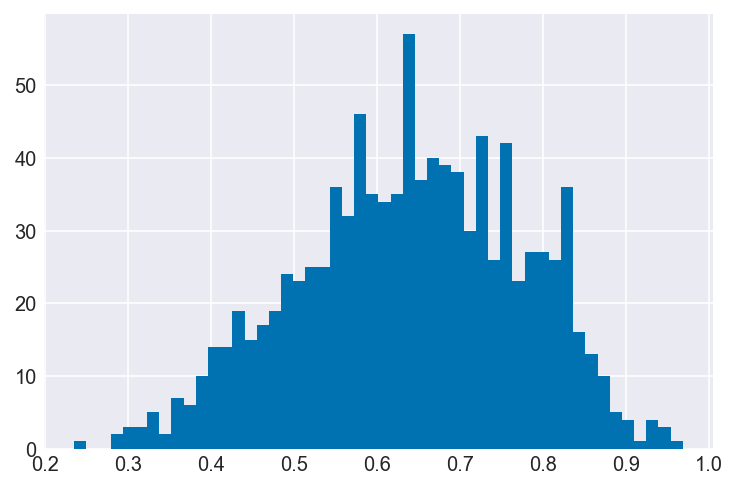

In [14]:
size = 1000
pg, po, w, n = grid_approximation(np.ones(size), 6, 9)
samples = np.random.choice(pg, p=po, size=size, replace=True)
plt.hist(samples, bins=50)

## 2H4

In [15]:
np.mean(samples < 0.2)

0.0

In [16]:
np.mean(samples > 0.8)

0.137

In [17]:
np.mean((samples < 0.8) & (samples > 0.2))

0.863

In [18]:
np.percentile(samples, 20)

0.5223223223223223

In [19]:
perc_range = np.percentile(samples, [80, 100])[0]
perc_range

0.7617617617617618

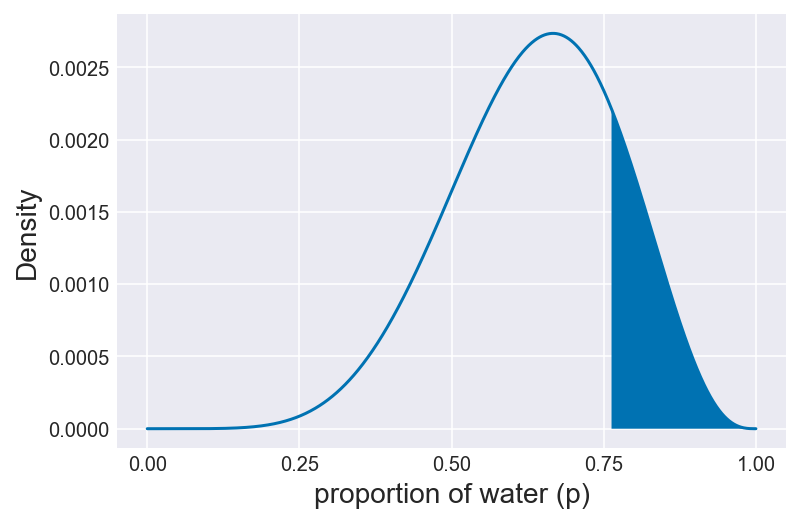

In [20]:
plt.plot(pg, po)
plt.xlabel('proportion of water (p)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks([0,0.25,0.50,0.75,1.00])
plt.fill_between(pg, po, where = (pg > perc_range))

In [21]:
az.hpd(samples, credible_interval=0.66)

array([0.53353353, 0.8028028 ])

In [23]:
np.percentile(samples, [17, 83])

array([0.50550551, 0.77977978])

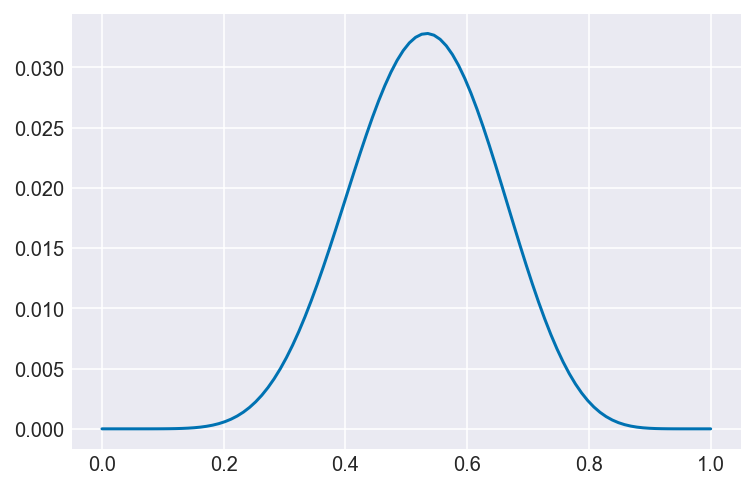

In [96]:
pg, po, w, n = grid_approximation(np.ones(100), success=8, tosses=15)
plt.plot(pg, po)

In [97]:
np.random.seed(1492)
samples2 = np.random.choice(pg, p=po, size=10000, replace=True)
az.hpd(samples2, credible_interval=.9)

array([0.34343434, 0.72727273])

0.1439

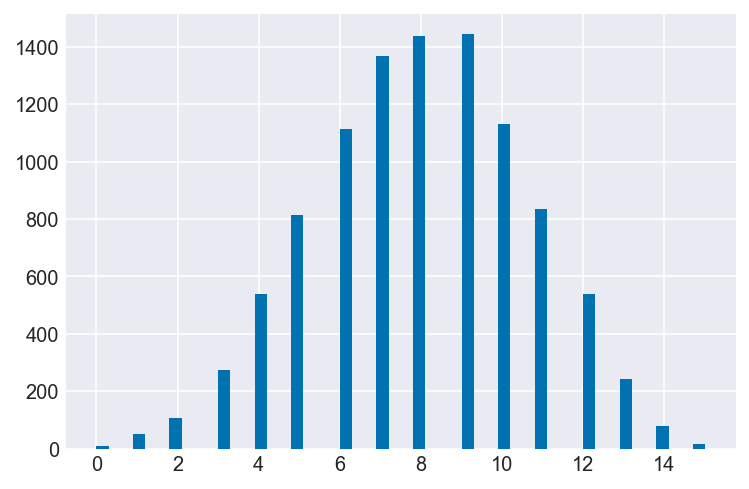

In [98]:
ppc = stats.binom.rvs(n=15, size=10000, p=samples2)
plt.hist(ppc, bins=50)
np.mean(ppc == 8)

0.1756

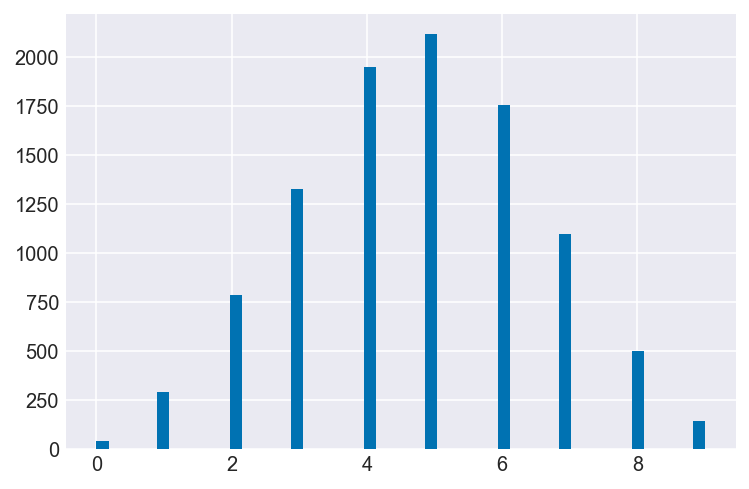

In [99]:
ppc2 = stats.binom.rvs(n=9, size=10000, p=samples2)
plt.hist(ppc2, bins=50)
np.mean(ppc2 == 6)

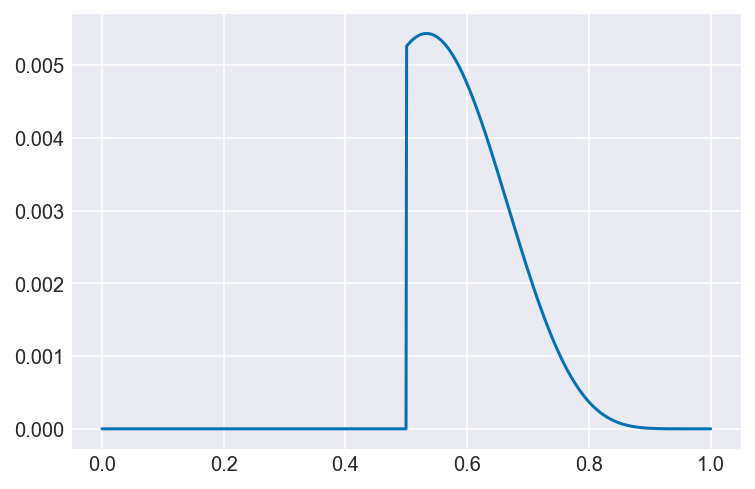

In [3]:
prior3 = np.where(np.linspace(start=0, stop=1, num=1000) < 0.5, 0, 1)
pg3, po3, w, n = grid_approximation(prior3, success=8, tosses=15)
plt.plot(pg3, po3)

In [9]:
samples3 = np.random.choice(pg3, p=po3, size=10000, replace=True)
az.hpd(samples3, credible_interval=.9)

(array([], dtype=int64),)

0.1597

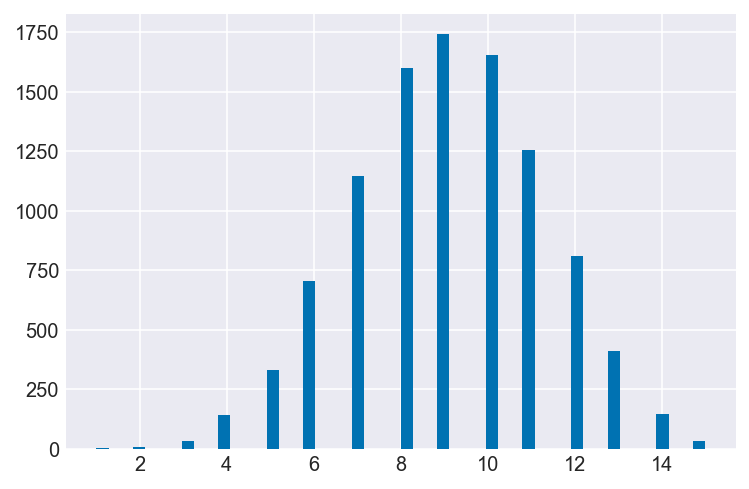

In [11]:
ppc3 = stats.binom.rvs(n=15, size=10000, p=samples3)
plt.hist(ppc3, bins=50)
np.mean(ppc3 == 8)

0.2323

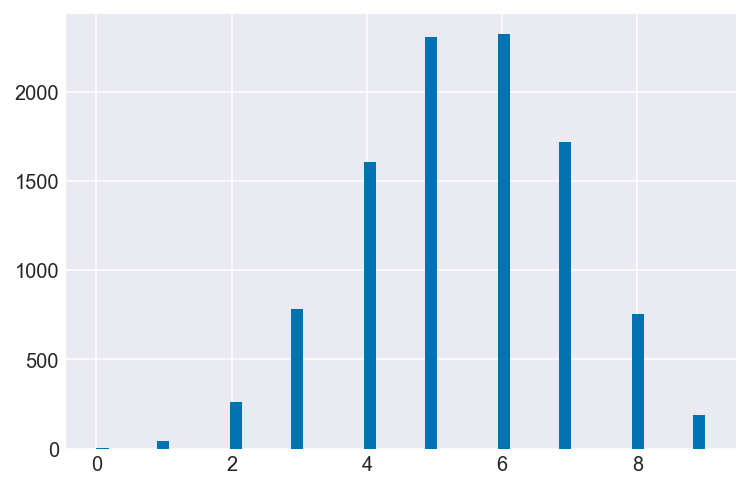

In [14]:
ppc4 = stats.binom.rvs(n=9, size=10000, p=samples3)
plt.hist(ppc4, bins=50)
np.mean(ppc4 == 6)

In [15]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0, 0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0, 1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

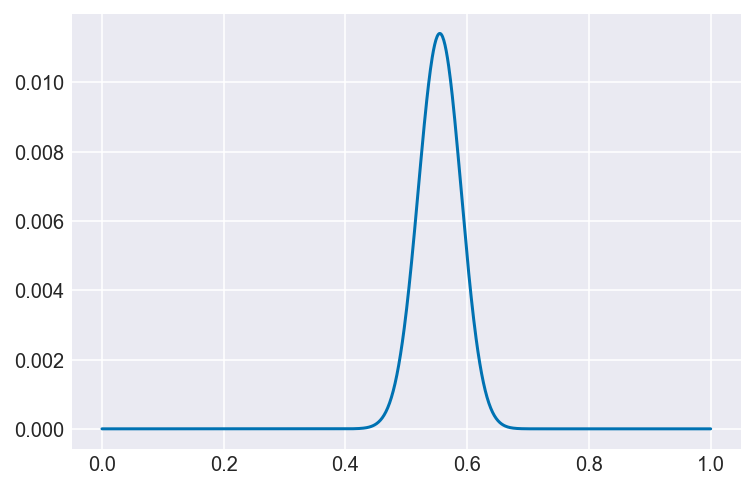

In [33]:
total = len(birth1) + len(birth2)
boys = sum(birth1) + sum(birth2)
pg, po, b, n = grid_approximation(np.ones(1000), success=boys, tosses=total)
plt.plot(pg, po)

In [27]:
pg[po == max(po)]

array([0.55455455])

In [38]:
samples = np.random.choice(pg, p=po, size=10000, replace=True)

In [40]:
for i in (0.5, 0.89, 0.97):
    print(f'{i}:', az.hpd(samples, credible_interval=i))

0.5: [0.52652653 0.57357357]
0.89: [0.5005005  0.61261261]
0.97: [0.47747748 0.62762763]


In [42]:
ppc = stats.binom.rvs(n=200, size=10000, p=samples)

In [56]:
np.mean(ppc == boys)

0.0374

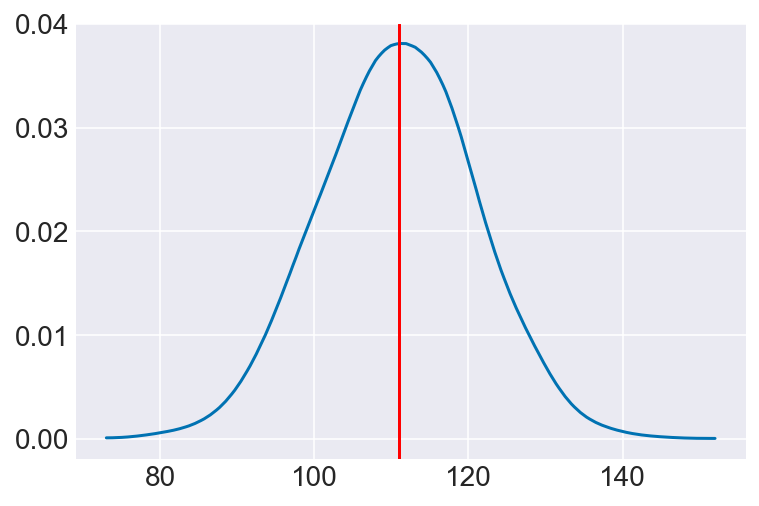

In [61]:
az.plot_kde(ppc)
plt.axvline(boys, color='red')

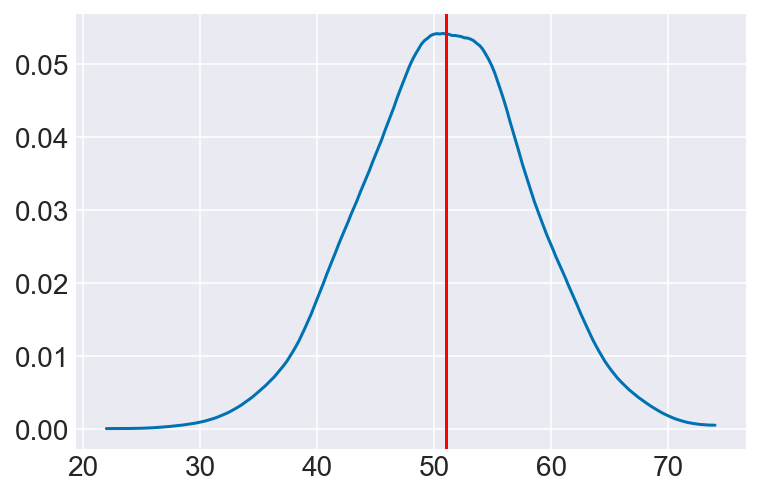

In [58]:
boys2 = sum(birth1)
pg2, po2, b2, n2 = grid_approximation(np.ones(1000), success=boys2, tosses=len(birth1))
samples2 = np.random.choice(pg2, p=po2, size=10000, replace=True)
ppc2 = stats.binom.rvs(n=100, size=10000, p=samples2)
az.plot_kde(ppc2)
plt.axvline(boys2, color='red')

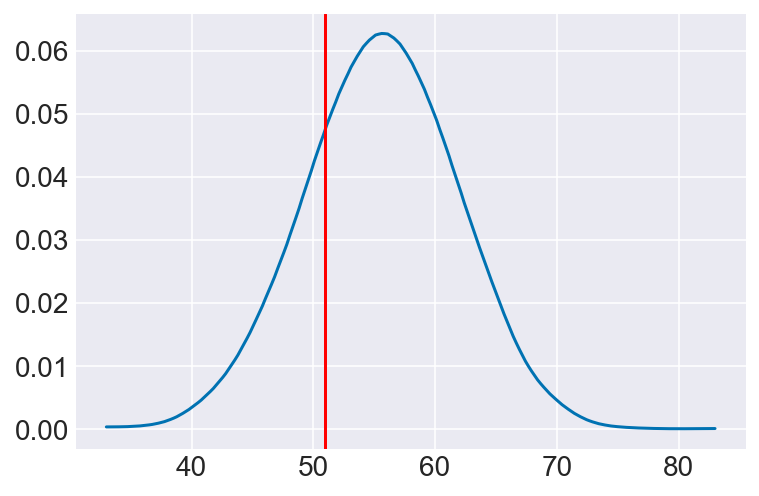

In [60]:
ppc3 = stats.binom.rvs(n=100, size=10000, p=samples)
az.plot_kde(ppc3)
plt.axvline(boys2, color='red')

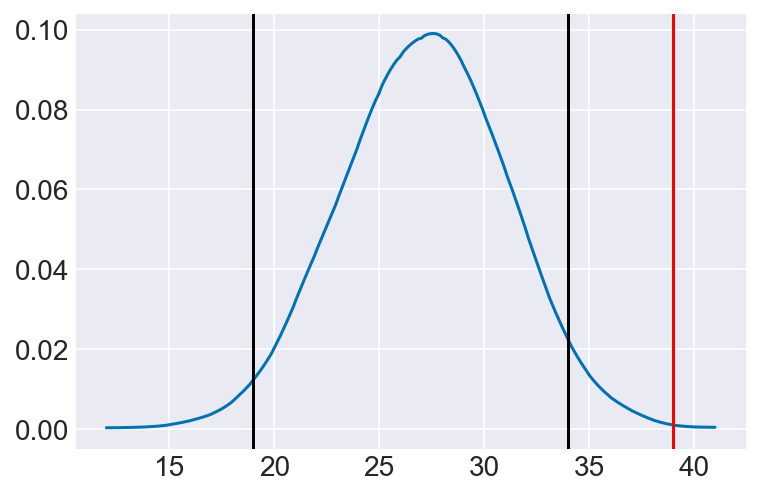

In [77]:
first_girls = len(birth1) - sum(birth1)
boys_after_girls = birth2[birth1 == 0]
samples4 = stats.binom.rvs(n=first_girls, size=10000, p=samples)
az.plot_kde(samples4)
plt.axvline(sum(boys_after_girls), color='red')
lower, upper = az.hpd(samples4, 0.95)
plt.axvline(lower, color='black')
plt.axvline(upper, color='black')

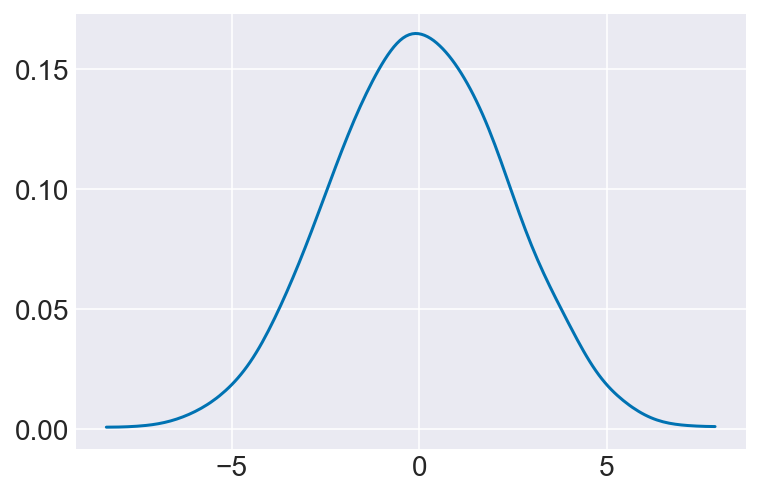

In [95]:
pos = np.random.uniform(-1, 1, size=(16, 10000)).sum(0)
az.plot_kde(pos)

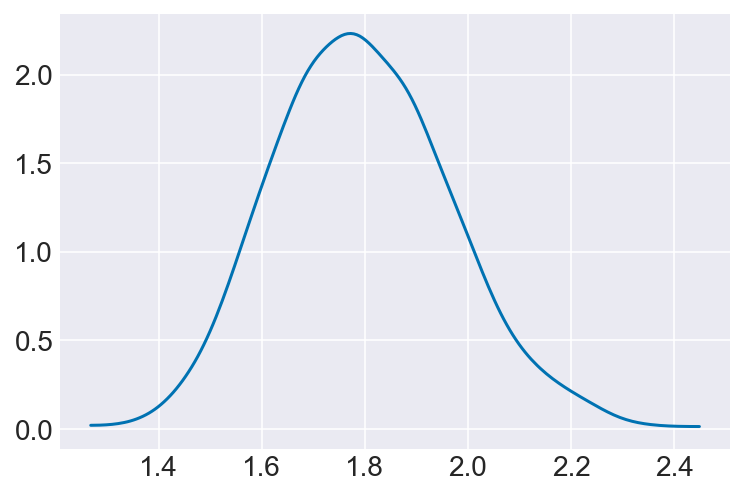

In [97]:
pos = np.random.uniform(1, 1.1, size=(12, 10000)).prod(0)
az.plot_kde(pos)

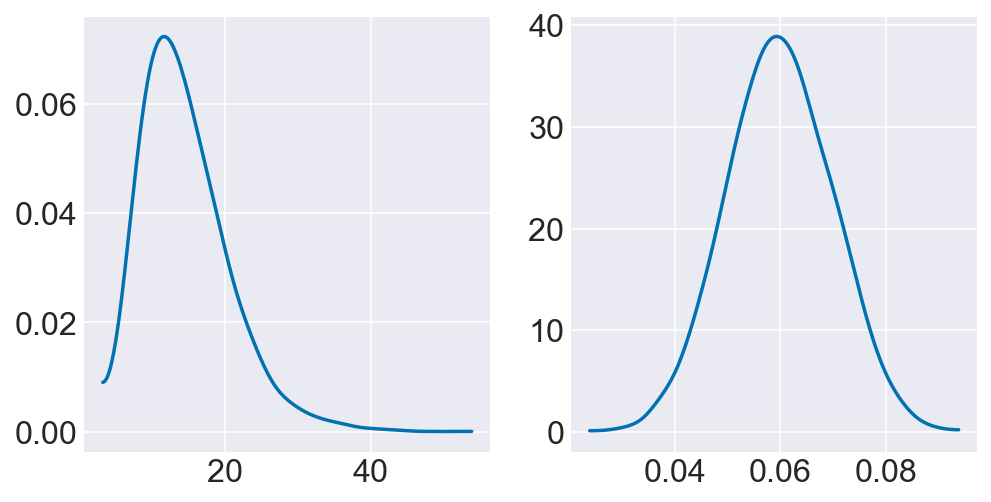

In [102]:
big = np.random.uniform(1, 1.5, size=(12, 10000)).prod(0)
small = np.random.uniform(1, 1.01, size=(12, 10000)).prod(0))
_, ax = plt.subplots(1,2, figsize=(8,4))
az.plot_kde(big, ax=ax[0])
az.plot_kde(small, ax=ax[1])

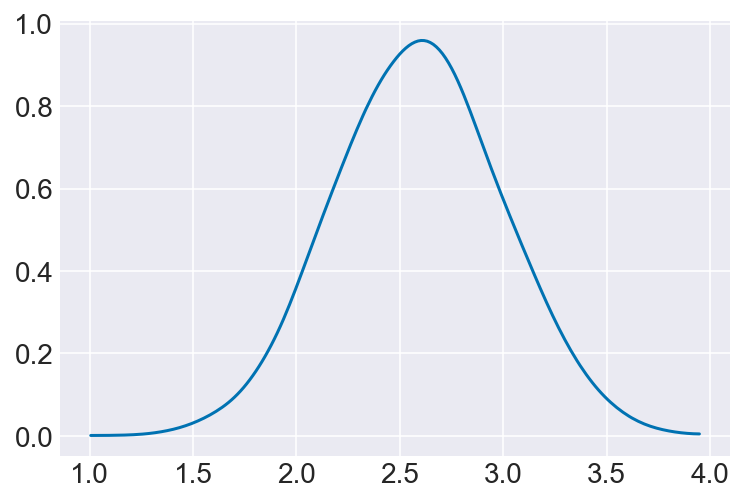

In [101]:
pos = np.log(np.random.uniform(1, 1.5, size=(12, 10000)).prod(0))
az.plot_kde(pos)

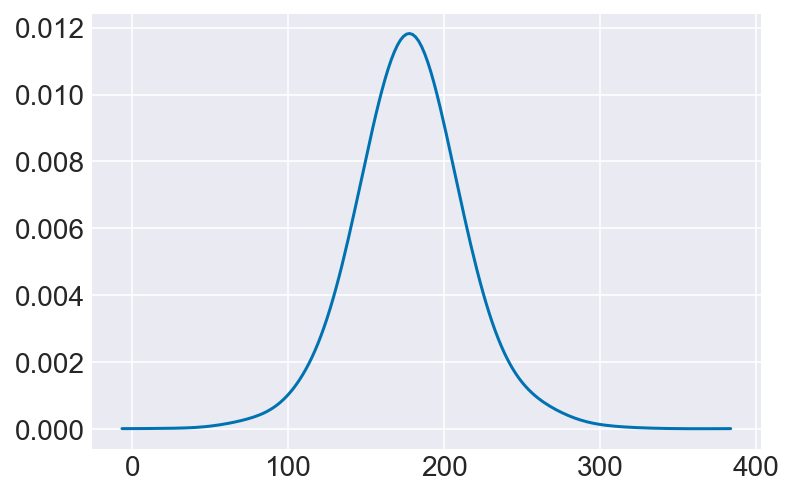

In [109]:
sample_size = 10000
m = stats.norm.rvs(178, 20, sample_size)
s = stats.uniform.rvs(0, 50, sample_size)
prior_h = stats.norm.rvs(m, s, sample_size)
az.plot_kde(prior_h)

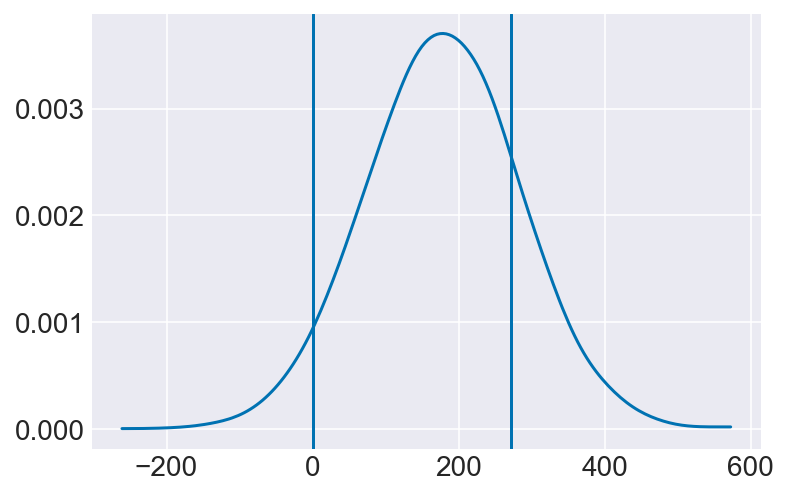

In [113]:
m = stats.norm.rvs(178, 100, sample_size)
s = stats.uniform.rvs(0, 50, sample_size)
prior_h = stats.norm.rvs(m, s, sample_size)
az.plot_kde(prior_h)

In [115]:
print(np.mean(prior_h < 0))
np.mean(prior_h > 272)

0.0433


0.1804